In [1]:
from flask import Flask, render_template, redirect 
from flask_pymongo import PyMongo 
import pandas as pd 
import urllib.request 
from datetime import datetime 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
app = Flask(__name__)

In [3]:
from splinter import Browser
from bs4 import BeautifulSoup
def init_browser():
    # @NOTE: Replace the path with your actual path to the chromedriver
    executable_path = {"executable_path": "C:\chrome_driver\chromedriver.exe"}
    return Browser("chrome", **executable_path, headless=False)

In [4]:
import requests
url = urllib.request.urlopen("https://projects.fivethirtyeight.com/2020-primaries/democratic/national/").read()
soup = BeautifulSoup(url,'lxml')


In [5]:
def p2f(x): # this is code i stole to strip percentages and convert to number, it also skips function if blank
    if not x: 
        return x 
    else: 
        return float(x.strip('%'))/100 

In [6]:
# this will be to convert over a date 
def convert_date(y):
    r = y.split("-")
    r2 = r[1].split(',')
    r2
    r3= r[0].split(' ')
    almost_there = r3[0]+ " " +r2[0]+r2[1]
    almost_there2 = almost_there
    datetime_object = datetime.strptime(almost_there2, '%b %d %Y')
    return(datetime_object)
    
    

In [7]:

i=0
results = []
table = soup.find('table')
table_rows = table.find_all('tr')
date = []
Biden =[]
Warren =[]
Sanders =[]
Harris =[]
Buttigieg =[]
Yang =[]
Rourke=[]
Booker=[]
Castro=[]
Klobuchar=[]
Gabbard=[]
Williamson=[]
Bullock=[]
Messam=[]
Ryan=[]
Benne=[]


for tr in table_rows:
    td = tr.find_all('td')
    #print(td.text)
    n =0
    row = []
    for i in td:
        a = i.text
        # this is where i need to put in a function that converrts the text to a usable date. 
        if n==2:
            if len(a) >16 or len(a) == 11 or len(a)==12 :
                row.append(a)
            else:
                row.append(convert_date(a))
            #else:    
                #date_proper = convert_date(a)
                #row.append(date_proper)
            n = n+1
        elif n ==6 or n==7 or n==8 or n==9 or n==10 or n==11 or n==12 or n==13:
            row.append(p2f(a))
            n = n+1
        else:
            n = n+1
    print(row)
    results.append(row)
    #row = [[i.text for i in td]]
#     row = []
#     i = 0
#     while i <= 20:
#         row.append(td)
#         i=i+1
#     # this injects all the texts from each spot in our row. 
# we have all the data, but we only want the first 20 columns.     

[]
[datetime.datetime(2019, 10, 17, 0, 0), 0.34, 0.15, 0.16, 0.05, 0.03, 0.04, 0.02, 0.02]
['Oct 16, 2019', 0.31, 0.18, 0.21, 0.07, 0.06, 0.02, 0.02, 0.03]
[datetime.datetime(2019, 10, 15, 0, 0), 0.25, 0.13, 0.28, 0.05, 0.06, 0.02, 0.02, 0.02]
[datetime.datetime(2019, 10, 13, 0, 0), 0.27, 0.11, 0.3, 0.04, 0.08, 0.02, 0.02, 0.02]
[datetime.datetime(2019, 10, 13, 0, 0), 0.32, 0.19, 0.21, 0.06, 0.05, 0.03, 0.02, 0.03]
[datetime.datetime(2019, 10, 11, 0, 0), 0.36, 0.14, 0.16, 0.06, 0.06, 0.03, 0.02, 0.02]
[datetime.datetime(2019, 10, 11, 0, 0), 0.35, 0.15, 0.18, 0.06, 0.05, 0.03, 0.02, 0.02]
[datetime.datetime(2019, 10, 8, 0, 0), 0.32, 0.17, 0.22, 0.05, 0.04, 0.03, 0.02, 0.02]
[datetime.datetime(2019, 10, 8, 0, 0), 0.25, 0.13, 0.28, 0.05, 0.05, 0.01, 0.01, 0.03]
[datetime.datetime(2019, 10, 7, 0, 0), 0.31, 0.17, 0.15, 0.06, 0.04, 0.04, 0.01, 0.02]
[datetime.datetime(2019, 10, 7, 0, 0), 0.26, 0.16, 0.29, 0.03, 0.04, 0.01, 0.02, 0.03]
[datetime.datetime(2019, 10, 7, 0, 0), 0.33, 0.16, 0.19, 

In [8]:
######  COMMENT FORMAT: 
######       # # # #  action - reason
######       ## comment, snark 
######       

# # # #  list to df - it's pretty
results_df = pd.DataFrame(results) 

# # # #  drop row 0 - it's NaN 
results_df = results_df.drop(results_df.index[0]) 
  
# # # #  ren var (col={j:"abc123"}) - abc > 123
results_df = results_df.rename(columns={0: "date", 1: "Biden", 2: "Warren", 3: "Sanders", 4: "Harris", 
                                          5: "Buttigieg", 6: "Yang", 7: "O'Rourke", 8: "Booker"}) 
  
# # # #  save as csv for safe keeping - i'm going to break this when i'm off line.
results_df.to_csv('results_df.csv', index=False) 

results_df.head(20)

,date,Biden,Warren,Sanders,Harris,Buttigieg,Yang,O'Rourke,Booker
1,2019-10-17 00:00:00,0.34,0.15,0.16,0.05,0.03,0.04,0.02,0.02
2,"Oct 16, 2019",0.31,0.18,0.21,0.07,0.06,0.02,0.02,0.03
3,2019-10-15 00:00:00,0.25,0.13,0.28,0.05,0.06,0.02,0.02,0.02
4,2019-10-13 00:00:00,0.27,0.11,0.30,0.04,0.08,0.02,0.02,0.02
5,2019-10-13 00:00:00,0.32,0.19,0.21,0.06,0.05,0.03,0.02,0.03
6,2019-10-11 00:00:00,0.36,0.14,0.16,0.06,0.06,0.03,0.02,0.02
7,2019-10-11 00:00:00,0.35,0.15,0.18,0.06,0.05,0.03,0.02,0.02
8,2019-10-08 00:00:00,0.32,0.17,0.22,0.05,0.04,0.03,0.02,0.02
9,2019-10-08 00:00:00,0.25,0.13,0.28,0.05,0.05,0.01,0.01,0.03
10,2019-10-07 00:00:00,0.31,0.17,0.15,0.06,0.04,0.04,0.01,0.02


In [9]:
# # # #  coerce the object strings into float64 - usability
results_df['Biden'] = pd.to_numeric(results_df['Biden'], errors='coerce')
results_df['Warren'] = pd.to_numeric(results_df['Warren'], errors='coerce')
results_df['Sanders'] = pd.to_numeric(results_df['Sanders'], errors='coerce') 
results_df['Harris'] = pd.to_numeric(results_df['Harris'], errors='coerce')
results_df['Buttigieg'] = pd.to_numeric(results_df['Buttigieg'], errors='coerce') 
results_df['Yang'] = pd.to_numeric(results_df['Yang'], errors='coerce')
results_df["O'Rourke"] = pd.to_numeric(results_df["O'Rourke"], errors='coerce')  
results_df['Booker'] = pd.to_numeric(results_df['Booker'], errors='coerce') 

# # # #  output counts - record changes in sample size due to cleaning   
results_df.count()

date         287
Biden        281
Warren       286
Sanders      287
Harris       287
Buttigieg    260
Yang         283
O'Rourke     283
Booker       240
dtype: int64

In [10]:
# # # #  drop cases where Biden or Warren is missing - no time series absent them
results_df = results_df.dropna(subset=['Biden', 'Warren', 'Sanders', 'Harris']) 
## 
##   CASE HANDLING NOTES:  ( biden only=5, both=1, warren only=0 ) 
##   NB Sanders and Harris have no empty values.  
##   These missing values are from "If not the leader, then who" surveys 
## 

# # # #  Fill in missing values for other candidates - OLS won't emptiness
results_df = results_df.fillna(0) 
## 
##   NOTES:  Missing: Yang=47, Gabbard=27, Buttigieg=27, others < 5% .
##         in all cases but O'Rourke, at the point the missing value occurred, 
##         zero substitution is warranted.
##         with Beto, the four missing values would be significantly non-zero, 
##         but there are only four missing, so no big deal. 
##


# # # #  output counts - record changes in sample size due to cleaning 
results_df.count()

date         281
Biden        281
Warren       281
Sanders      281
Harris       281
Buttigieg    281
Yang         281
O'Rourke     281
Booker       281
dtype: int64

In [11]:
# # # # #  FOO  # # # # #        # # # # #  FOO  # # # # # 

# # # #  go through a rigamaroll just to delete data in wrong format - data cleanliness is data godliness 
## this isn't nearly as ugly as it was before I gave up trying to save ALL the data.
results_df['foo'] = results_df['date'].str.split('-').str[1]
results_df['foo'] = pd.to_datetime(results_df.foo).dt.strftime('%m/%d/%Y')

## this only works if you cast it twice 
results_df['chow'] = results_df['date'].astype(str)  ####### 
results_df.loc[results_df.foo == 'NaT', 'goo'] = results_df['chow'].str.split(' ').str[0] 
## "It only works if the number is two!" 

# drop the *oo vars - data cleanliness is data godliness
results_df = results_df.dropna()
results_df = results_df.drop(columns=['foo', 'chow', 'goo'])


In [12]:
plt.scatter(city_weather_df.Lat, city_weather_df.Humidity, color= 'blue', marker='o', s=10)

NameError: name 'city_weather_df' is not defined

In [13]:
results_df['foo'] = results_df['date'].str.split('-').str[1]
results_df['foo'] = pd.to_datetime(results_df.foo).dt.strftime('%m/%d/%Y')


In [14]:
plt.figure(figsize=(9,6))
plt.scatter(city_weather_df.Lat, city_weather_df.Humidity, color= 'blue', marker='o', s=10)
plt.title("Latitude and Humidity (2019.10.02)")
plt.savefig('Lat_X_Humidity.png')

NameError: name 'city_weather_df' is not defined

<Figure size 648x432 with 0 Axes>

C:\Users\adam9\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


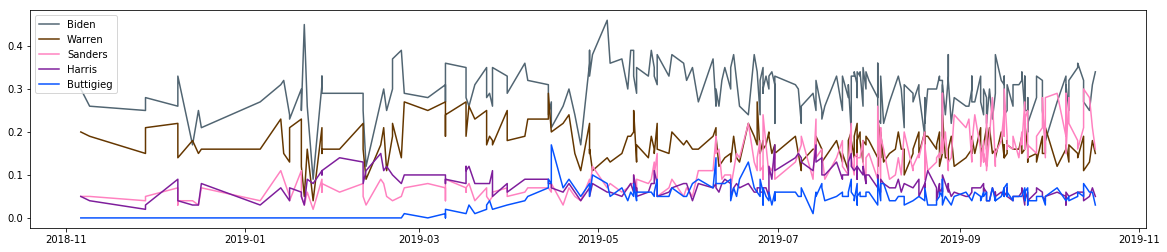

In [15]:
#make graphs. 
fig= plt.figure(figsize=(20,4))
plt.plot(results_df.date, results_df.Biden, color ='xkcd:slate')
plt.plot(results_df.date, results_df.Warren, color = 'xkcd:brown')
plt.plot(results_df.date, results_df.Sanders, color = 'xkcd:pink')
plt.plot(results_df.date, results_df.Harris, color = 'xkcd:purple')
plt.plot(results_df.date, results_df.Buttigieg, color = 'xkcd:electric blue')
plt.legend(('Biden', 'Warren', 'Sanders','Harris','Buttigieg'))



In [547]:
#### issue: multiple polls on same day.  easy to solve.
# result_df = results_df.drop_duplicates(subset='date', keep="last")
result_df = results_df.sort_values('date', ascending=False)\
       .drop_duplicates(['date'])\
       .drop('date', 1)
result_df.tail(12) 

KeyError: Index(['date'], dtype='object')

In [548]:
### reveals dates are still not in a single format
results_df = results_df.iloc[:-8, np.r_[-8:0]] 


In [542]:
#make graphs. 
fig= plt.figure(figsize=(20,4))
plt.plot(result_df.date, result_df.Biden, color ='xkcd:slate')
plt.plot(result_df.date, result_df.Warren, color = 'xkcd:brown')
plt.plot(result_df.date, result_df.Sanders, color = 'xkcd:pink')
plt.plot(result_df.date, result_df.Harris, color = 'xkcd:purple')
plt.plot(result_df.date, result_df.Buttigieg, color = 'xkcd:electric blue') 

AttributeError: 'DataFrame' object has no attribute 'date'

<Figure size 1440x288 with 0 Axes>

In [ ]:
#  so i suppose i should have dropped duplicates instead of meaning them

In [509]:
## there were mixed data types and mixed formats within: 
## dates as text date ranges, dates as (MMM dd, yy) aka ($b $c, $d) and cetera 
##  REFER TO (../HellFromDate.ipynb) for details on why the ordinary was done:
##  I did not rescue 10% of the database
##  but spent maybe an hour a percent.

In [ ]:
#  This is Walter noting here:
# I just failed to load the rasmussen page. 
# it's a simple table, but I floundered. 
#  rasmussen.ipynb


In [448]:
%cd "C:\Users\kwlei\Documents\538\project2\goo\"

trump_load = "trump.csv"
trump_df = pd.read_csv(trump_load)
trump_df.head() 

C:\Users\kwlei\Documents\538\project2\goo


,Date,ApprovalIndex,StronglyApprove,StronglyDisapprove,TotalApprove,TotalDisapprove
0,16-Oct-19,-3,37%,40%,50%,49%
1,15-Oct-19,-6,35%,41%,49%,50%
2,14-Oct-19,-8,34%,42%,49%,50%
3,11-Oct-19,-7,35%,42%,49%,50%
4,10-Oct-19,-10,33%,43%,47%,51%


In [532]:
result_df

,Biden,Warren,Sanders,Harris,Buttigieg,Yang,O'Rourke,Booker
date,,,,,,,,
2018-11-06 00:00:00,0.300000,0.200000,0.050000,0.050000,0.000000,0.000000,0.050000,0.000000
2018-11-09 00:00:00,0.260000,0.190000,0.050000,0.040000,0.000000,0.080000,0.030000,0.000000
2018-11-28 00:00:00,0.265000,0.180000,0.045000,0.025000,0.000000,0.080000,0.035000,0.000000
2018-12-09 00:00:00,0.296667,0.166667,0.046667,0.056667,0.000000,0.110000,0.036667,0.000000
2018-12-14 00:00:00,0.170000,0.180000,0.040000,0.030000,0.000000,0.110000,0.020000,0.000000
2018-12-16 00:00:00,0.250000,0.150000,0.030000,0.030000,0.000000,0.080000,0.030000,0.000000
2018-12-17 00:00:00,0.210000,0.160000,0.070000,0.080000,0.000000,0.210000,0.040000,0.000000
2019-01-06 00:00:00,0.270000,0.160000,0.040000,0.030000,0.000000,0.070000,0.030000,0.000000
2019-01-13 00:00:00,0.310000,0.230000,0.110000,0.070000,0.000000,0.080000,0.030000,0.000000


In [531]:
polls_df = pd.merge(result_df, trump_df, how="left", on=["Date", "Date"])

KeyError: 'Date'

In [ ]:
shkola_df = pd.merge(school_data, grouped_studat_df.mean(), 
                     how="left", on=["school_name", "school_name"]) 


In [459]:
trump_df = trump_df.dropna()
trump_df.count()

Date                  695
ApprovalIndex         695
StronglyApprove       695
StronglyDisapprove    695
TotalApprove          695
TotalDisapprove       695
dtype: int64

In [457]:
##   show heads and tails
ends = results_df.iloc[np.r_[230:240]]
print (ends)
ends = []  


                    date  Biden  Warren  Sanders  Harris  Buttigieg  Yang  \
272  2019-01-16 00:00:00   0.23    0.21     0.04    0.07        0.0  0.08   
273  2019-01-16 00:00:00   0.24    0.13     0.05    0.04        0.0  0.09   
274  2019-01-14 00:00:00   0.32    0.15     0.09    0.06        0.0  0.08   
275  2019-01-13 00:00:00   0.31    0.23     0.11    0.07        0.0  0.08   
276  2019-01-06 00:00:00   0.27    0.16     0.04    0.03        0.0  0.07   
277  2018-12-17 00:00:00   0.21    0.16     0.07    0.08        0.0  0.21   
278  2018-12-16 00:00:00   0.25    0.15     0.03    0.03        0.0  0.08   
279  2018-12-14 00:00:00   0.17    0.18     0.04    0.03        0.0  0.11   
280  2018-12-09 00:00:00   0.33    0.14     0.04    0.04        0.0  0.09   
281  2018-12-09 00:00:00   0.30    0.14     0.03    0.04        0.0  0.09   

     O'Rourke  Booker  
272      0.03     0.0  
273      0.02     0.0  
274      0.02     0.0  
275      0.03     0.0  
276      0.03     0.0  
277     